The evaluation is based the following property graph model, each node has a label `person', and each node has attributes includes 'age', 'name', 'x_pos'
, 'y_pos' and 'status'. For the facebook graph, each node is linked by edges typed in 'A', and in the youtube graph, each node is linked by edge 'A' or type 'B'.



We conduct three evaluation cases from Geri's thesis: dating query, money query and central path query. The example queries are stored in the /query directory. In Geri's thesis, there are variants for each case, the following evaluation only takes the most difficult variant, i.e.

For money query, the parameterized regular expression is 
```
  (person {?p - ?q < 7 and ?p > age and ?q < age})/ ((:A {true}) /(person { ?p - ?q < 7 and ?p > age and ?q < age }))+
```

For dating query, the parameterized regular expression for the facebook graph is 
```
(person {?p == age and ?x == pos_x and ?y == pos_y})/ ((:A {true})/(person {true}))*/(:A {true}) /(person {
?p * 0.5 + 7 <= age
and  (?x - pos_x) + (?y - pos_y) <= 20 and
        (?x - pos_x) + (pos_y - ?y) <= 20 and
        (pos_x - ?x) + (?y - pos_y) <= 20 and
        (pos_x - ?x) + (pos_y - ?y) <= 20 and status == "single"
})
```

and the dating query parameterized regular expression for the youtube graph is 
```
(person {?p == age and ?x == pos_x and ?y == pos_y})/ ((:B {true})/(person {true}))*/(:B {true}) /(person {
?p * 0.5 + 7 <= age
and  (?x - pos_x) + (?y - pos_y) <= 20 and
        (?x - pos_x) + (pos_y - ?y) <= 20 and
        (pos_x - ?x) + (?y - pos_y) <= 20 and
        (pos_x - ?x) + (pos_y - ?y) <= 20 and status == "single"
})
```

For central path query, the parameterized regular expression for the facebook graph  is 
```
(person {
 (?x - pos_x) + (?y - pos_y) <= 35 and
    (?x - pos_x) + (pos_y - ?y) <= 35 and
    (pos_x - ?x) + (?y - pos_y) <= 35 and
    (pos_x - ?x) + (pos_y - ?y) <= 35
})/ ((:A {true}) /(person {
    (?x - pos_x) + (?y - pos_y) <= 35 and
    (?x - pos_x) + (pos_y - ?y) <= 35 and
    (pos_x - ?x) + (?y - pos_y) <= 35 and
    (pos_x - ?x) + (pos_y - ?y) <= 35
}))*
```

and the parameterized regilar expression for the youtube graph is:
```
(person {
 (?x - pos_x) + (?y - pos_y) <= 35 and
    (?x - pos_x) + (pos_y - ?y) <= 35 and
    (pos_x - ?x) + (?y - pos_y) <= 35 and
    (pos_x - ?x) + (pos_y - ?y) <= 35
})/ ((:A {true}) /(person {
    (?x - pos_x) + (?y - pos_y) <= 35 and
    (?x - pos_x) + (pos_y - ?y) <= 35 and
    (pos_x - ?x) + (?y - pos_y) <= 35 and
    (pos_x - ?x) + (pos_y - ?y) <= 35
}))*
```


In [22]:
import pickle 
import numpy as np
with open("result/fb_static.pkl","rb+") as f:
    data_fb = pickle.loads(f.read()) 

for i in data_fb:
    print(f"{i[1]} query, the max time is {format(np.max(i[2]),'.3f')} ms, the average time is {format(np.mean(i[2]),'.3f')} ms, and the variance is {format(np.var(i[2]),'.3f')}")

DATING query, the max time is 13688.892 ms, the average time is 6812.360 ms, and the variance is 18228374.684
MONEY query, the max time is 4407.791 ms, the average time is 218.718 ms, and the variance is 68279.023
CENTRAL query, the max time is 4457.737 ms, the average time is 216.378 ms, and the variance is 69625.369


In [31]:
import pickle 
import numpy as np
with open("result/ytb_static.pkl","rb+") as f:
    data_ytb = pickle.loads(f.read()) 

for i in data_ytb:
    print(f"{i[1]} query, the max time is {format(np.max(i[2]),'.3f')} ms, the average time is {format(np.mean(i[2]),'.3f')} ms, and the variance is {format(np.var(i[2]),'.3f')}")

DATING query, the max time is 60645.311 ms, the average time is 137.652 ms, and the variance is 1522725.537
MONEY query, the max time is 7843.564 ms, the average time is 16.836 ms, and the variance is 6492.109
CENTRAL query, the max time is 33.949 ms, the average time is 12.653 ms, and the variance is 34.708


Text(0, 1.02, 'The Numbers of Queries')

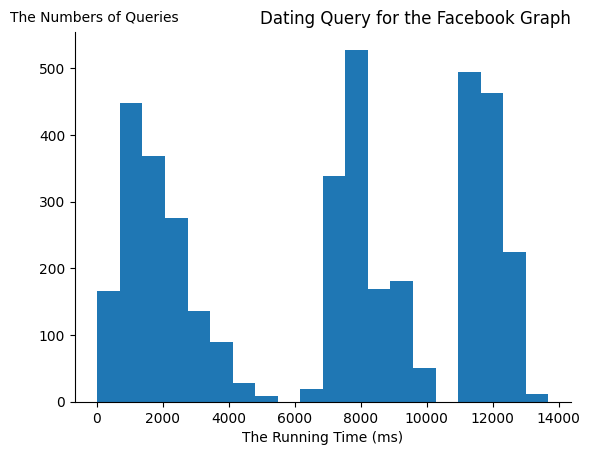

In [30]:
import matplotlib.pyplot as plt 
plt.title("Dating Query for the Facebook Graph",loc='right')
plt.hist(data_fb[0][2], bins=20)
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("The Running Time (ms)")
plt.ylabel("The Numbers of Queries", labelpad=-40, y =1.02, rotation=0)

Text(0, 1.02, 'The Numbers of Queries')

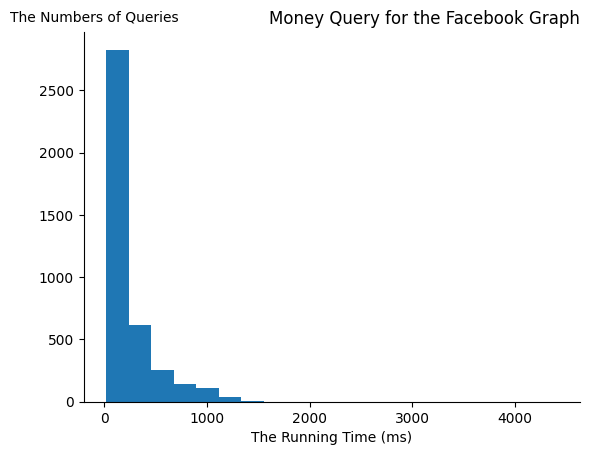

In [29]:
import matplotlib.pyplot as plt 
plt.title("Money Query for the Facebook Graph", loc= 'right')
plt.hist(data_fb[1][2], bins=20)
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("The Running Time (ms)")
plt.ylabel("The Numbers of Queries", labelpad=-40, y =1.02, rotation=0)

Text(0, 1.02, 'The Numbers of Queries')

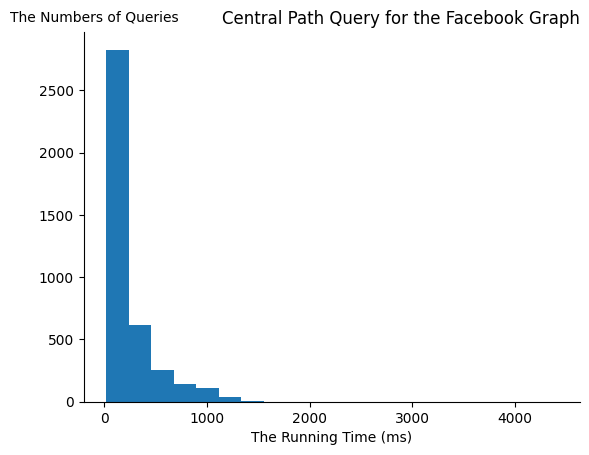

In [28]:
import matplotlib.pyplot as plt 
plt.title("Central Path Query for the Facebook Graph", loc= 'right')
plt.hist(data_fb[1][2], bins=20)
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("The Running Time (ms)")
plt.ylabel("The Numbers of Queries", labelpad=-40, y =1.02, rotation=0)

Text(0, 1.02, 'The Numbers of Queries')

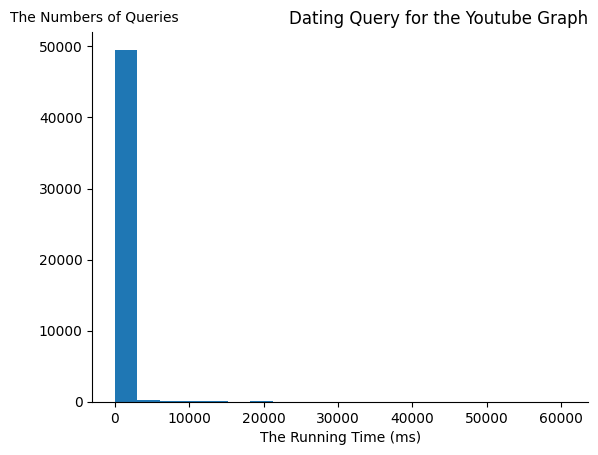

In [27]:
import matplotlib.pyplot as plt 
plt.title("Dating Query for the Youtube Graph",loc='right')
plt.hist(data_ytb[0][2], bins=20)
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("The Running Time (ms)")
plt.ylabel("The Numbers of Queries", labelpad=-40, y =1.02, rotation=0)

Text(0, 1.02, 'The Numbers of Queries')

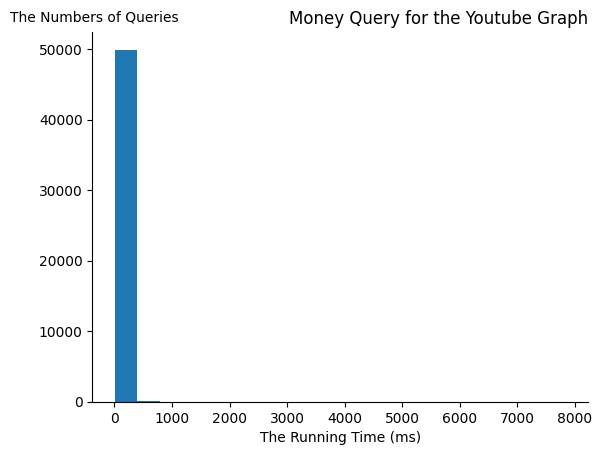

In [26]:
import matplotlib.pyplot as plt 
plt.title("Money Query for the Youtube Graph",loc='right')
plt.hist(data_ytb[1][2], bins=20)
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("The Running Time (ms)")
plt.ylabel("The Numbers of Queries", labelpad=-40, y =1.02, rotation=0)

Text(0, 1.02, 'The Numbers of Queries')

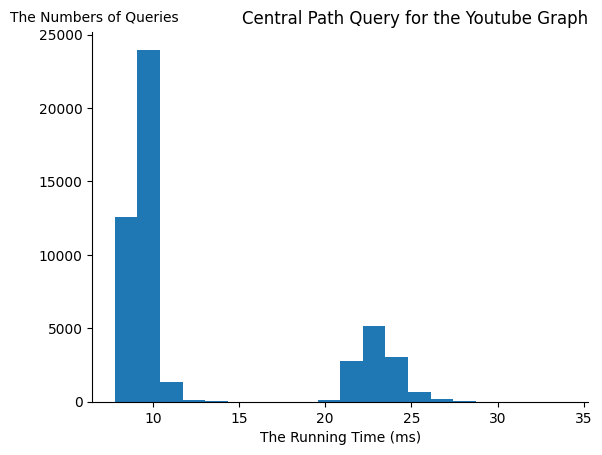

In [25]:
import matplotlib.pyplot as plt 
plt.title("Central Path Query for the Youtube Graph",loc='right')
plt.hist(data_ytb[2][2], bins=20)
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("The Running Time (ms)")
plt.ylabel("The Numbers of Queries", labelpad=-40, y =1.02, rotation=0)